In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#считываем данные
df = pd.read_csv('C:/Users/aizhi/Desktop/Практика/портфолио/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


*<h3>Content</h3>*
##### There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

**budget**: the budget of a movie. Some movies don't have this, so it appears as 0

**company**: the production company

**country**: country of origin

**director**: the director

**genre**: main genre of the movie.

**gross**: revenue of the movie

**name**: name of the movie

**rating**: rating of the movie (R, PG, etc.)

**released**: release date (YYYY-MM-DD)

**runtime**: duration of the movie

**score**: IMDb user rating

**votes**: number of user votes

**star**: main actor/actress

**writer**: writer of the movie

**year**: year of releasem

In [5]:
#пропущенные данные
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
#инвормация о столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [23]:
#конвертация realesed в формат даты 
date_series = df.released

# Удаляем лишний текст
date_series = date_series.str.replace(r'\s+\(.*\)', '')
#(r'\s+\(.*\)' ищет любую подстроку, которая начинается с одной или более пробельных символов,
#за которыми следует открывающая скобка, а затем любая последовательность символов до закрывающей скобки.

# Конвертируем в формат даты
date_series = pd.to_datetime(date_series)

# Конвертируем в европейский формат даты
df['released'] = date_series.dt.strftime("%d.%m.%Y")



C:\Users\aizhi\AppData\Local\Temp\ipykernel_19464\483783489.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  date_series = date_series.str.replace(r'\s+\(.*\)', '')
C:\Users\aizhi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13.06.1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\aizhi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20.06.1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\aizhi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25.07.1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_a

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,13.06.1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,07.02.1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,20.06.1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,07.02.1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,25.07.1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [24]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,13.06.1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,07.02.1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,20.06.1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,07.02.1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,25.07.1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
df=df.drop_duplicates()
df.corrwith(df.gross)


year       0.257486
score      0.186258
votes      0.630757
budget     0.740395
gross      1.000000
runtime    0.245216
dtype: float64

<AxesSubplot:>

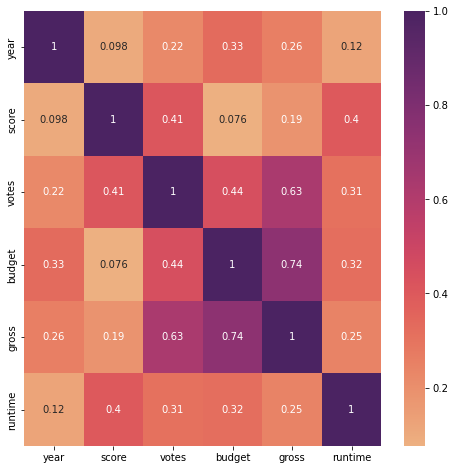

In [10]:
# матрица корреляции
fig , ax = plt.subplots(figsize=(8,8))

corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='flare')

Text(0.5, 1.0, 'Gross by year')

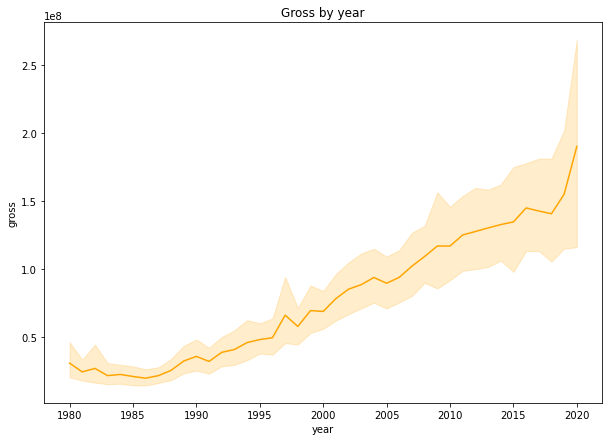

In [11]:
fig , ax= plt.subplots(figsize=(10,7))
sns.lineplot(data=df.sort_values(by='year'), x='year', y = 'gross',color='orange')
ax.set_title('Gross by year')

Text(0, 0.5, 'Gross')

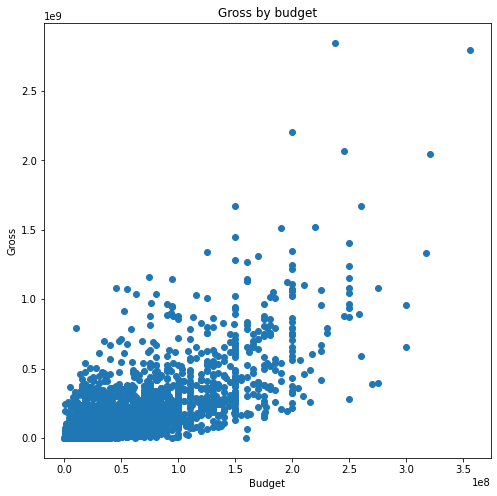

In [12]:
fig,ax  = plt.subplots(figsize=(8,8))
plt.scatter(x=df.budget, y=df.gross)
plt.title('Gross by budget')
plt.xlabel('Budget')
plt.ylabel('Gross')


<AxesSubplot:xlabel='budget', ylabel='gross'>

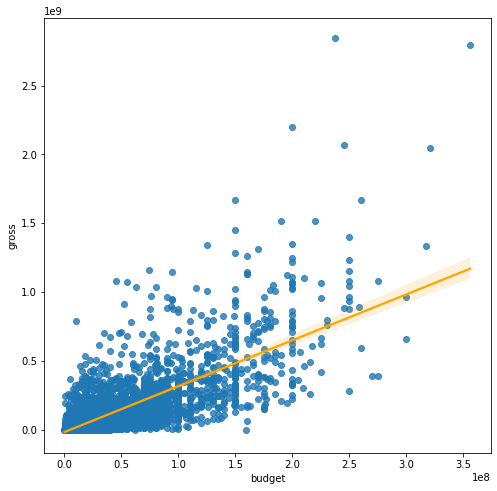

In [13]:
fig , ax = plt.subplots(figsize=(8,8))
sns.regplot(data=df,x='budget',y=df.gross,ax=ax,line_kws={'color':'orange'})


<AxesSubplot:xlabel='score', ylabel='gross'>

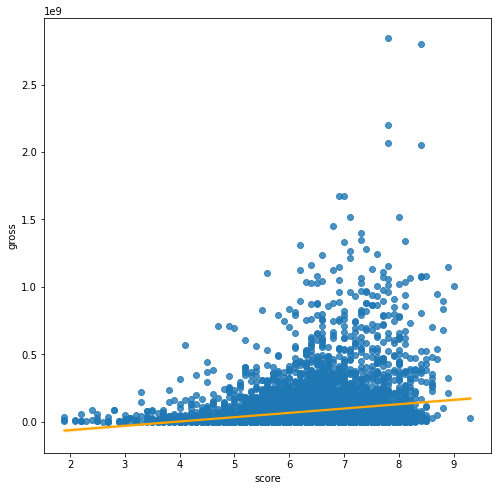

In [14]:
fig , ax = plt.subplots(figsize=(8,8))
sns.regplot(data=df, x='score',y='gross', line_kws={'color':'orange'})

Text(0.5, 1.0, 'Gross by genre(median)')

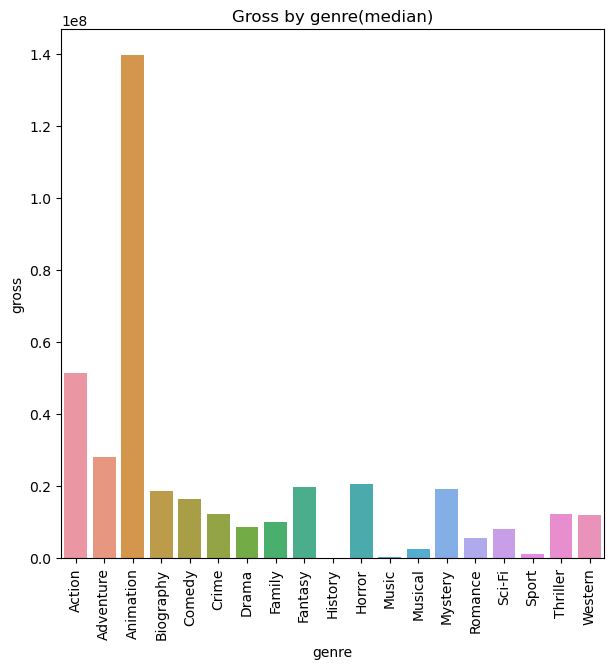

In [15]:
genre_gross=df.groupby('genre',as_index=False).gross.median()
fig, ax = plt.subplots(figsize=(7,7),dpi=100)
sns.barplot(data=genre_gross, x='genre', y = 'gross')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Gross by genre(median)')

Text(0.5, 1.0, 'Gross by genre')

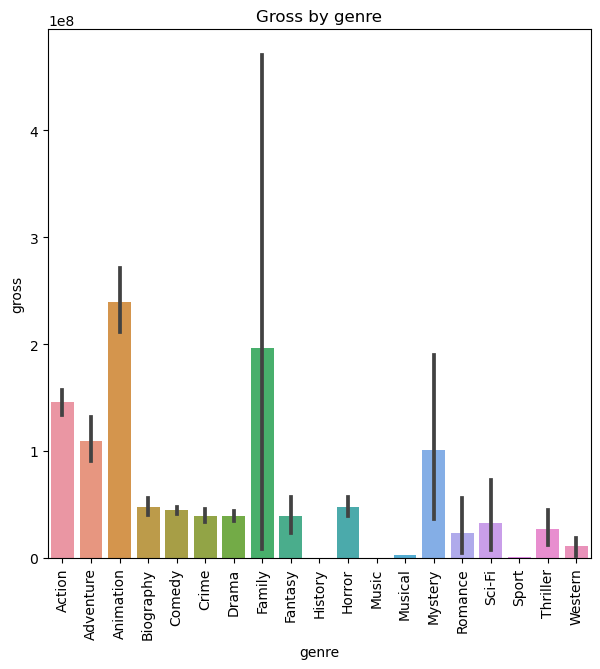

In [16]:
fig, ax = plt.subplots(figsize=(7,7),dpi=100)
sns.barplot(data=df.sort_values(by='genre'), x='genre', y = 'gross')
ax.tick_params(axis='x', rotation=90)   
ax.set_title('Gross by genre')
#gross_mean_value

Text(0.5, 1.0, 'Film Count in Country')

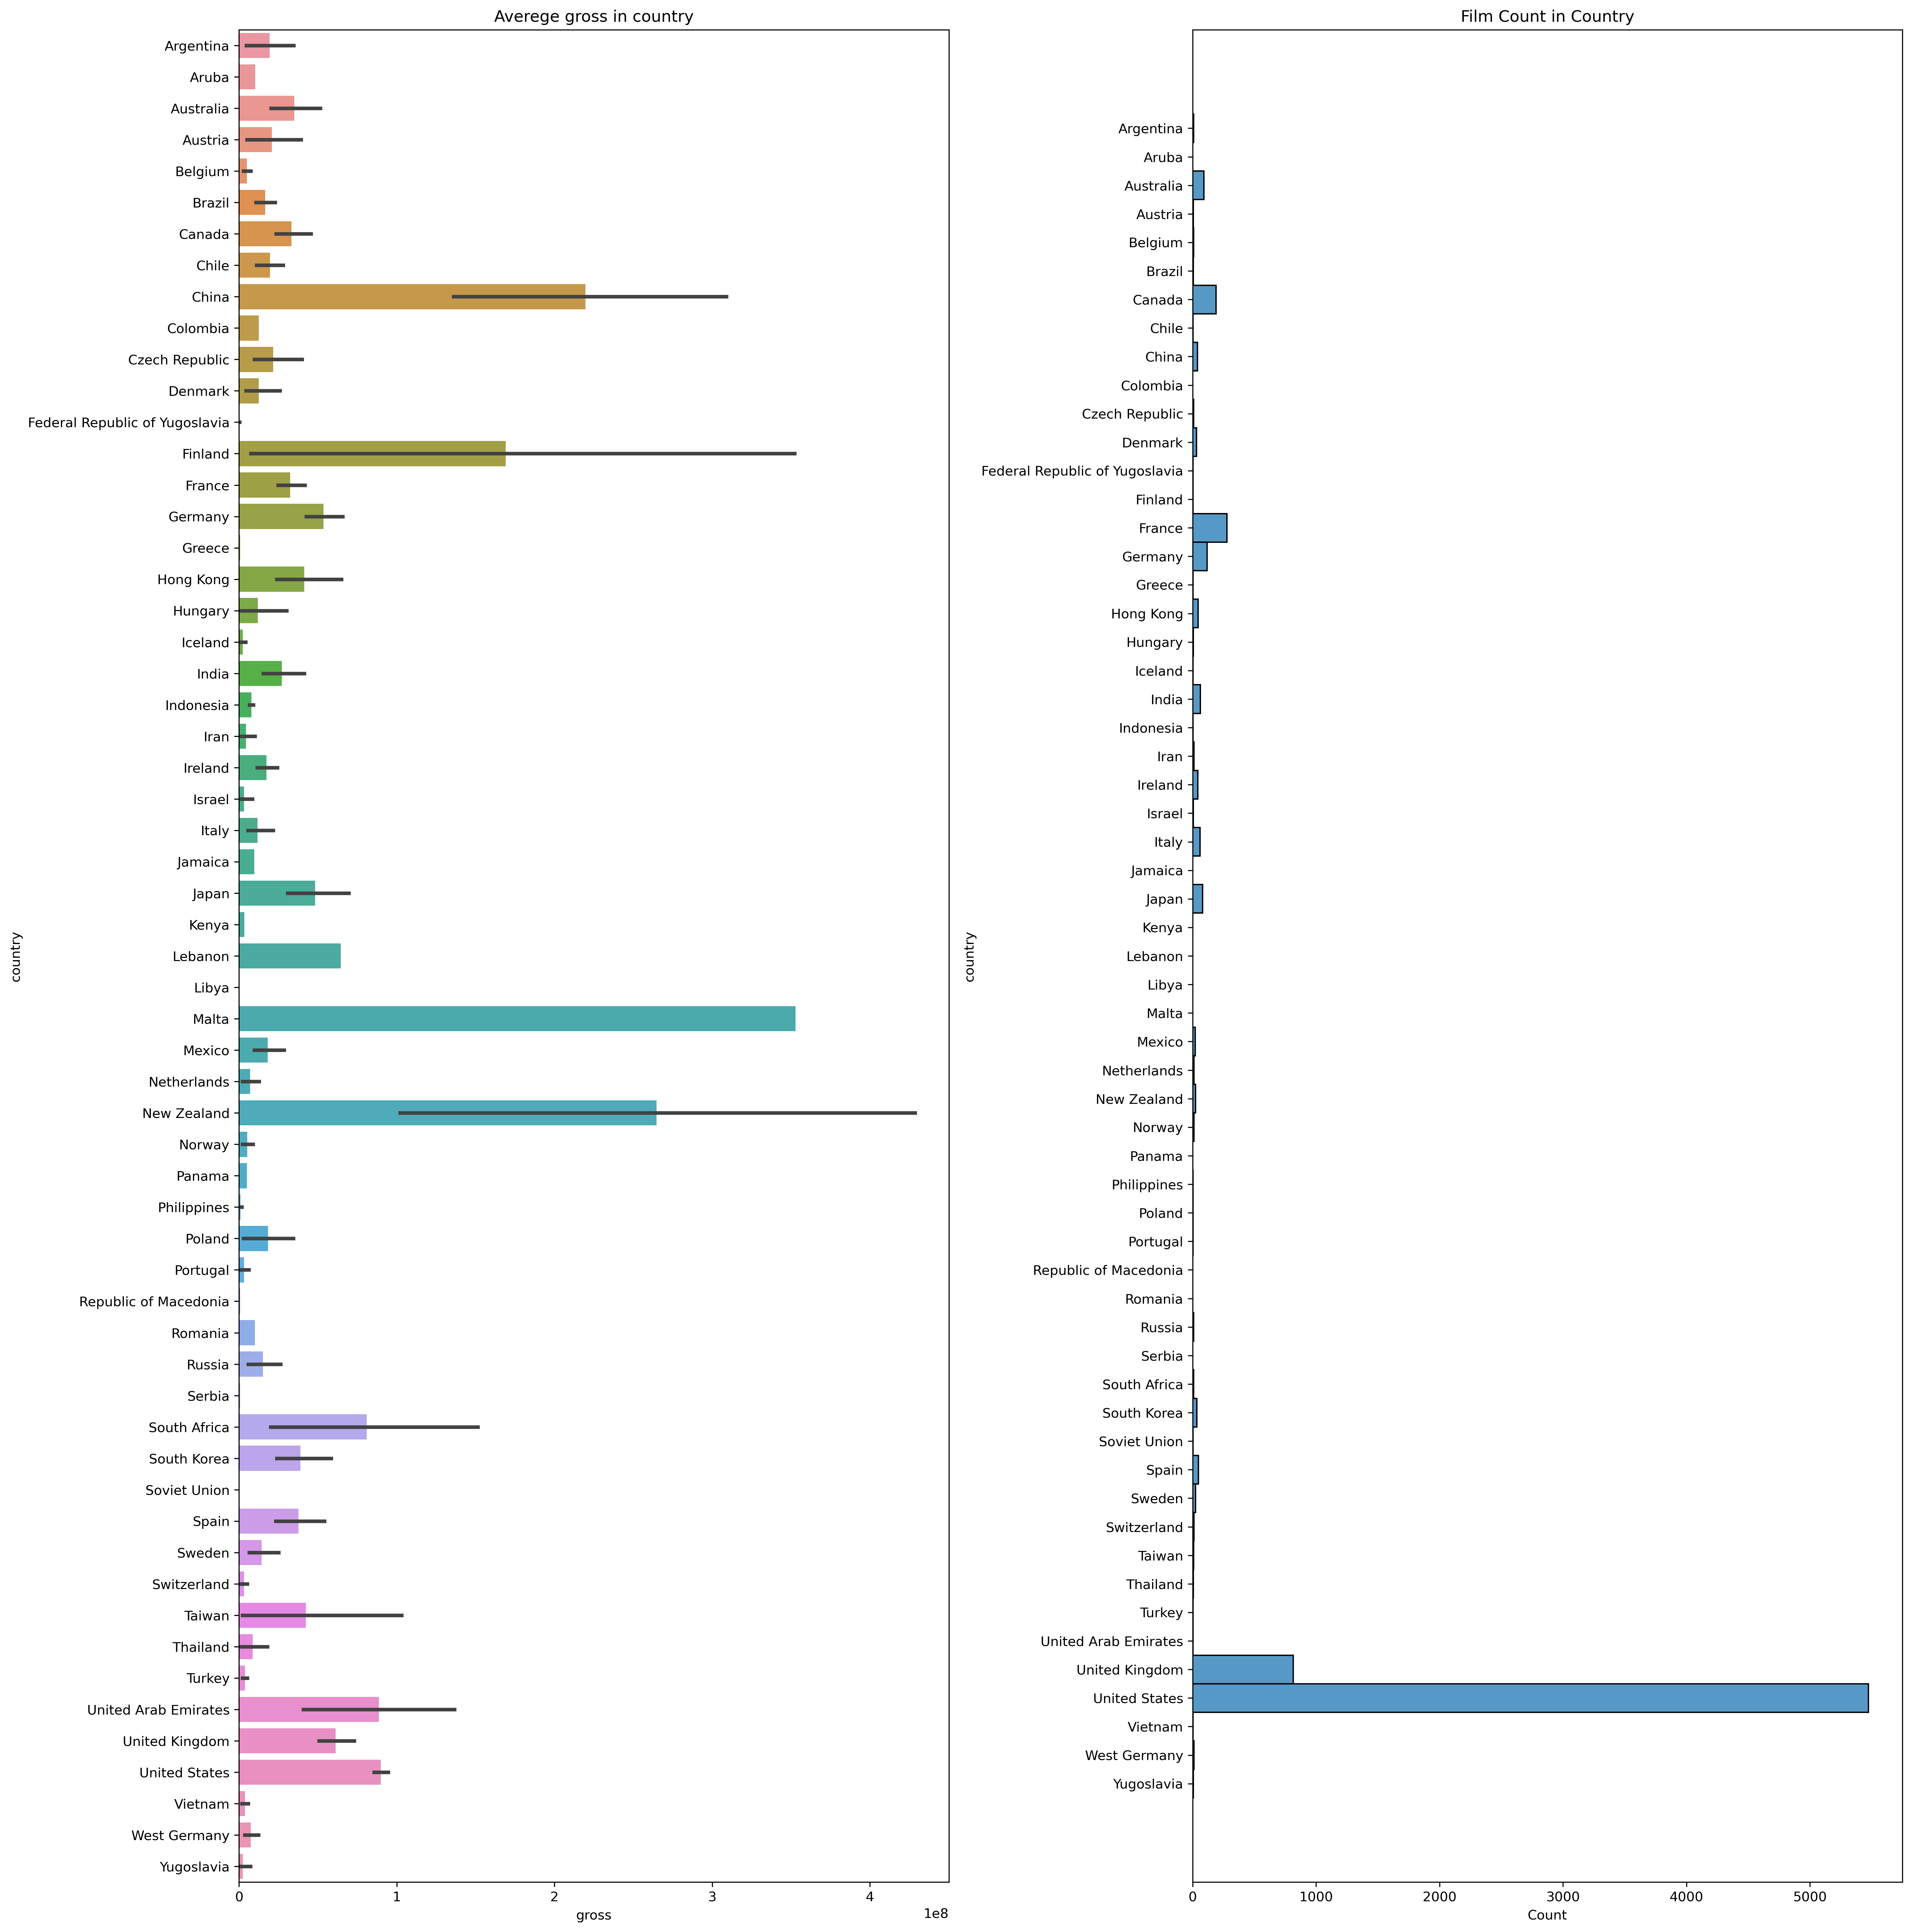

In [17]:
fig, ax = plt.subplots(ncols=2,dpi=300,figsize=(20,20))
sns.barplot(data=df.sort_values(by='country'), x='gross', y = 'country',ax=ax[0])
sns.histplot(data=df.sort_values(by='country'),y='country',ax=ax[1],binwidth=10)
plt.tight_layout()
ax[0].set_title('Averege gross in country')
ax[1].set_title('Film Count in Country')


#gross_mean_value

Text(0.5, 1.0, 'Gross by rating')

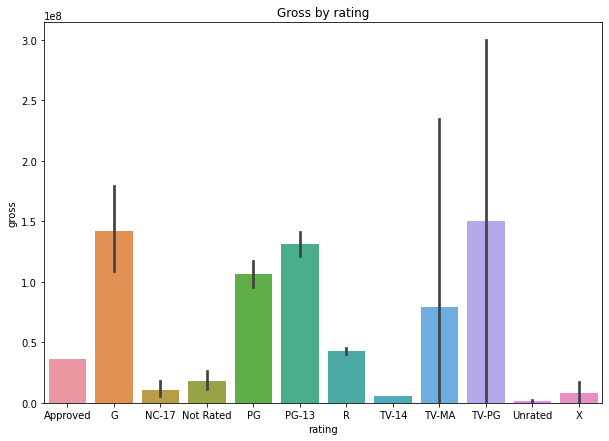

In [18]:
fig , ax= plt.subplots(figsize=(10,7))
sns.barplot(data=df.sort_values(by='rating'), x='rating', y = 'gross')
ax.set_title('Gross by rating')

Text(0.5, 1.0, 'Directors whose films have brought a lot of income(top50)')

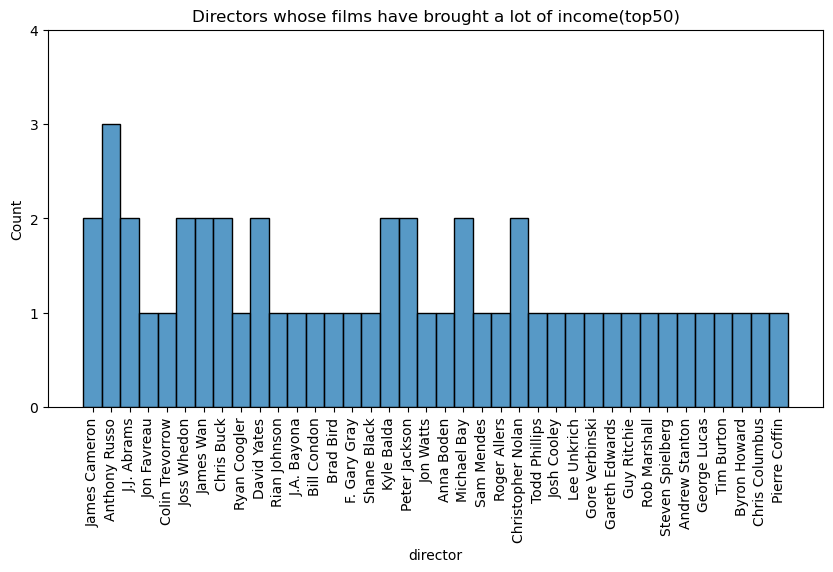

In [19]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.histplot(df.sort_values(by = 'gross',ascending=False).head(50),x='director')
ax.tick_params(axis='x', rotation=90)
plt.yticks(range(0, 5, 1))
ax.set_title('Directors whose films have brought a lot of income(top50)')

Text(0.5, 1.0, 'Stars whose films have brought a lot of income(top50)')

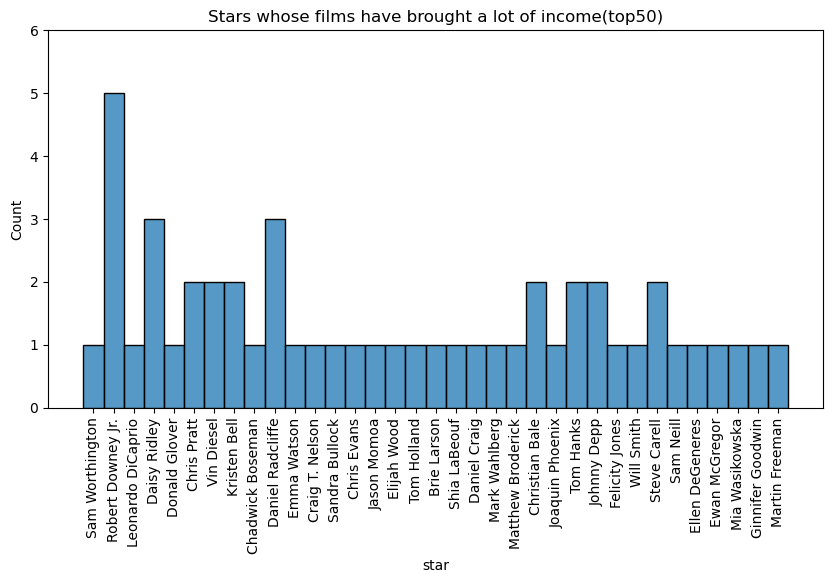

In [20]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.histplot(df.sort_values(by = 'gross',ascending=False).head(50),x='star')
ax.tick_params(axis='x', rotation=90)
plt.yticks(range(0, 7, 1))
ax.set_title('Stars whose films have brought a lot of income(top50)')

Text(0.5, 1.0, 'Writers whose films have brought a lot of income(top50)')

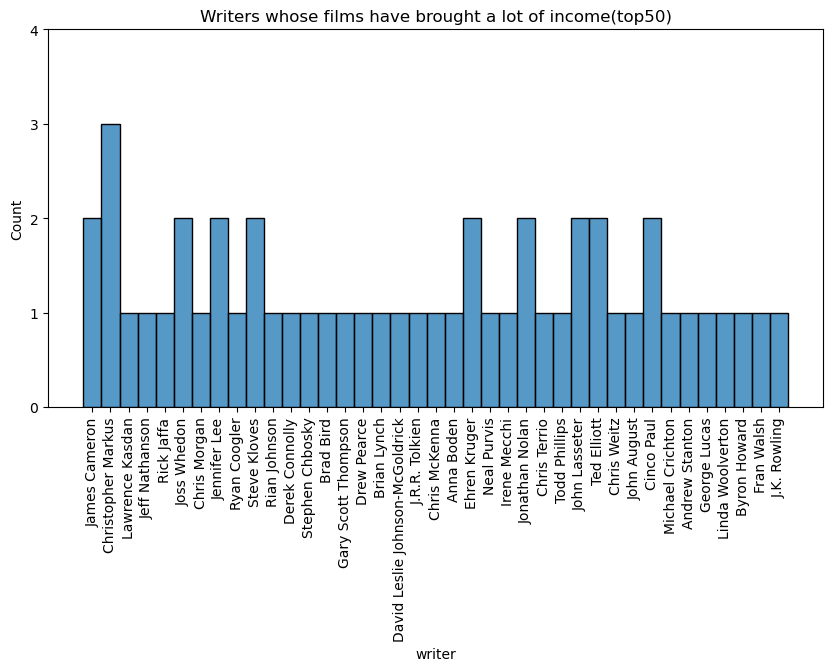

In [21]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.histplot(df.sort_values(by = 'gross',ascending=False).head(50),x='writer')
ax.tick_params(axis='x', rotation=90)
plt.yticks(range(0, 5, 1))
ax.set_title('Writers whose films have brought a lot of income(top50)')

Text(0.5, 1.0, 'Company whose films have brought a lot of income(top50)')

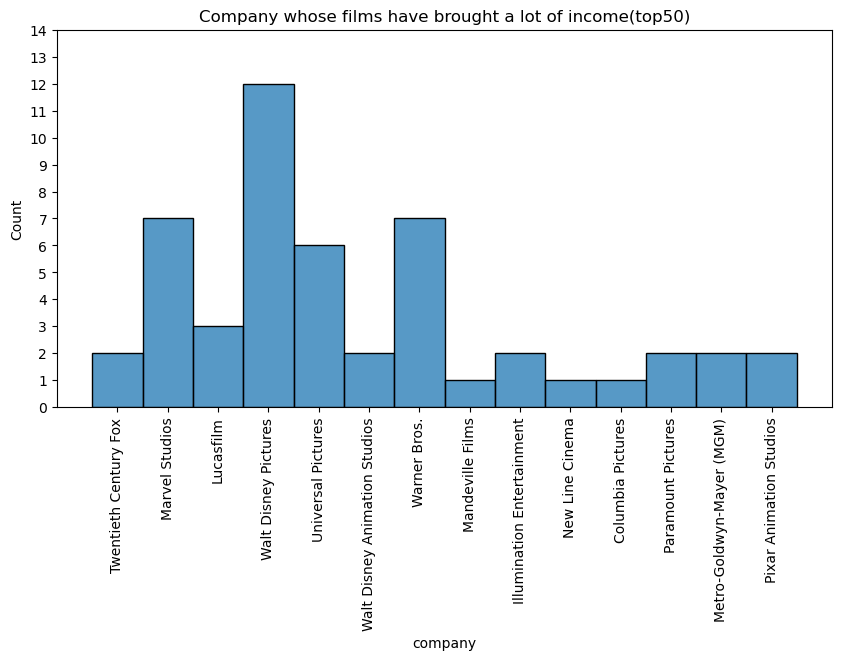

In [22]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.histplot(df.sort_values(by = 'gross',ascending=False).head(50),x='company')
ax.tick_params(axis='x', rotation=90)
plt.yticks(range(0,15, 1))
ax.set_title('Company whose films have brought a lot of income(top50)')